In [22]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [1]:
import sys
sys.path.append('../drlfoil/')

In [1]:
import gymnasium as gym
import drlfoil
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [7]:
env = gym.make('AirfoilEnv-v0', n_params=8, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(8), -0.1*np.ones(8), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.5, efficiency_param = 1, cl_wide = 20, render_mode="human",
                    n_boxes=2,
                    reynolds = 1e7)
model = PPO.load("logmodels/070524/070524_8Param_RandomReynolds_TwoBox_OptunaBest/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

In [52]:
# Enjoy trained agent
vec_env = model.get_env()
obs, _ = env.reset()

Step: 0, Action: [ 1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1.  1.], Reward: -100, Done: False, Done2: False Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.25 -0.25  0.05 -0.25
 -0.25 -0.25 -0.25 -0.25  0.15]


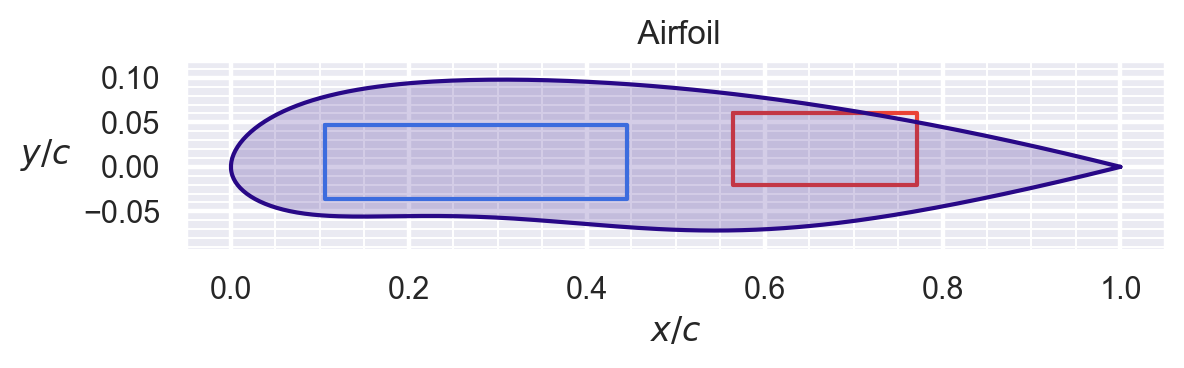

Step: 1, Action: [ 1.          0.6230434   1.          1.          1.          1.
  1.          1.         -1.         -0.32779396  0.73910785 -0.9572365
 -0.6695716  -0.39370424 -0.81092656 -1.          0.7591407 ], Reward: 25.708414046265563, Done: False, Done2: False Info: {'step': 2, 'efficiency': 38.851485039600604, 'cl': 0.35631145349661164}
Obs: [ 0.4         0.3434565   0.4         0.4         0.4         0.4
  0.4         0.4        -0.4        -0.2991691   0.16086619 -0.3935855
 -0.35043573 -0.30905566 -0.37163898 -0.4         0.2638711 ]


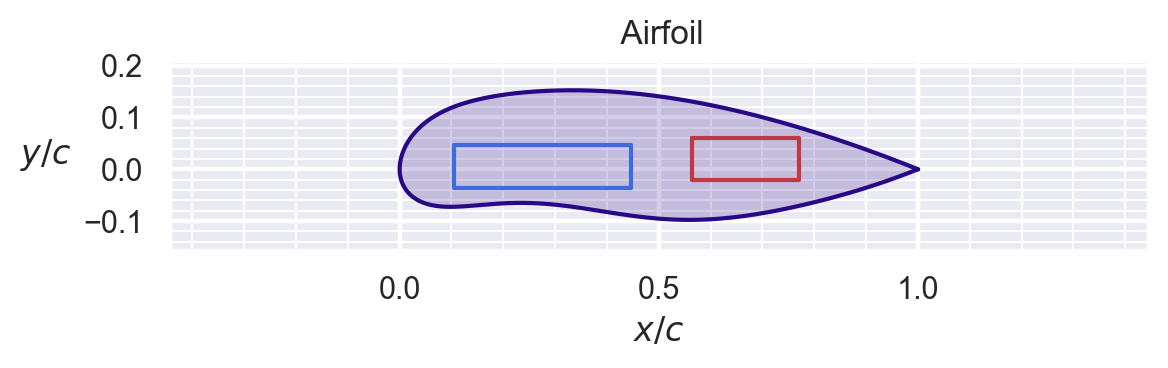

Step: 2, Action: [-0.07376169 -0.09660861  1.          1.          1.          1.
  0.90563655  1.         -0.98836136  0.4051698  -0.62575775 -0.23430331
  1.          1.          0.9835366  -1.         -0.13518584], Reward: 46.31412801438119, Done: False, Done2: False Info: {'step': 3, 'efficiency': 51.421210697778655, 'cl': 0.4276799849333346}
Obs: [ 0.38893574  0.32896522  0.55        0.55        0.55        0.55
  0.5358455   0.55       -0.54825425 -0.23839363  0.06700252 -0.428731
 -0.20043574 -0.15905564 -0.2241085  -0.55        0.24359323]


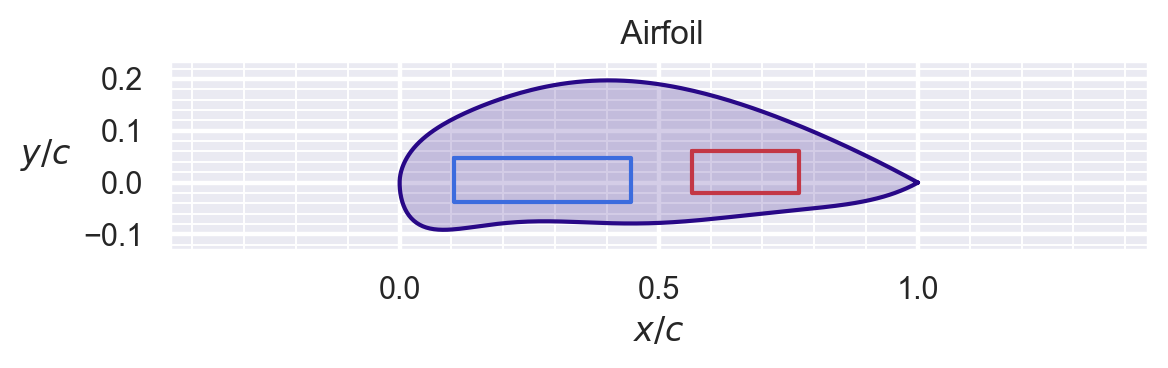

Step: 3, Action: [ 0.43095222  0.44468477 -0.11083746  1.          0.88002276  0.46977332
 -0.81092477 -0.24509767  0.28791198  0.20456359 -0.39648464 -0.5201236
  0.00685434 -1.          0.19827059  0.18117948  0.13195804], Reward: 58.34470114823729, Done: False, Done2: False Info: {'step': 4, 'efficiency': 59.05117672294124, 'cl': 0.524531537780349}
Obs: [ 0.4535786   0.39566794  0.53337437  0.70000005  0.68200344  0.620466
  0.41420677  0.5132354  -0.5050674  -0.20770909  0.00752982 -0.5067495
 -0.19940759 -0.30905566 -0.19436792 -0.5228231   0.26338693]


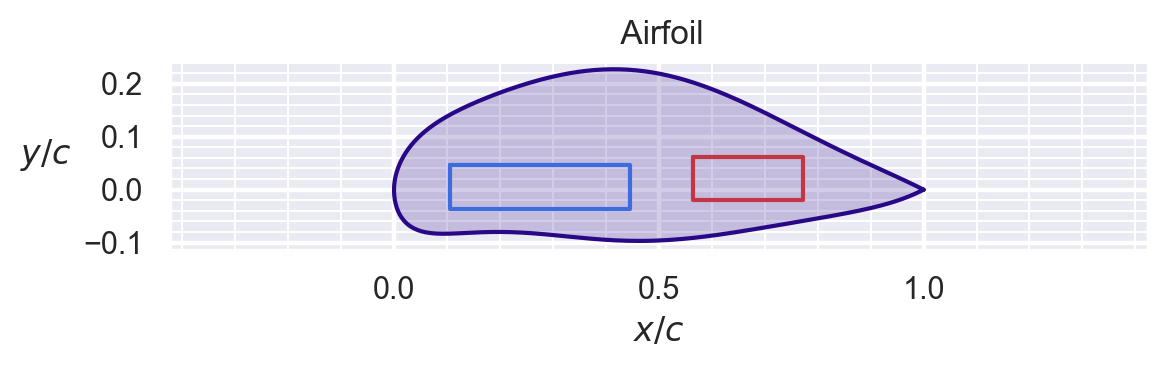

Step: 4, Action: [-0.6187474   0.37128353 -0.0705573  -0.27146274 -0.10580637 -0.68829185
  0.2179093   0.38689333 -0.5376186   0.6161017  -0.44512042  0.10283129
  0.79379773  0.42211396  0.2528044  -0.49437457 -0.52338105], Reward: 56.97877991772567, Done: False, Done2: False Info: {'step': 5, 'efficiency': 57.20621857272149, 'cl': 0.48588672184129866}
Obs: [ 0.36076647  0.45136046  0.5227908   0.6592806   0.6661325   0.5172222
  0.44689316  0.5712694  -0.5857102  -0.11529383 -0.05923824 -0.49132484
 -0.08033793 -0.24573855 -0.15644725 -0.59697926  0.18487978]


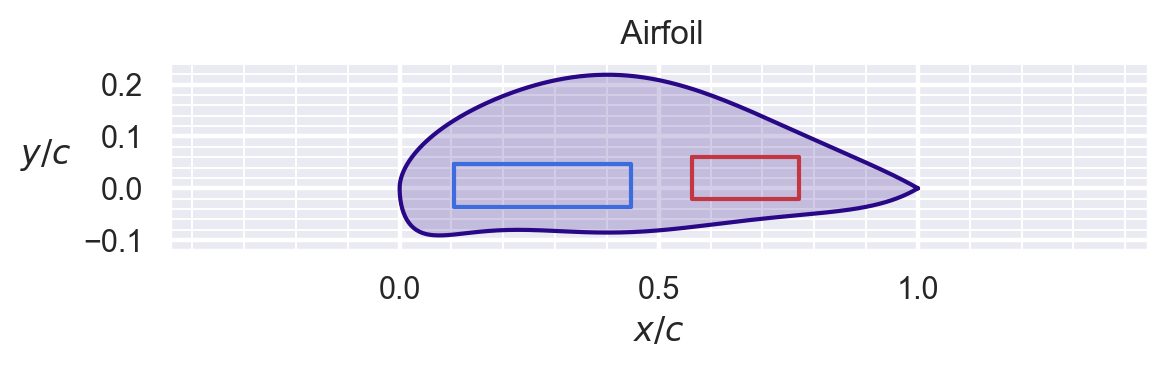

Step: 5, Action: [ 0.5426732  -0.10576798 -0.2037369   0.20968053 -0.06597809  0.14966808
 -0.35596126 -0.23857197  0.32280126  0.22106779 -0.15066725 -0.28099623
 -0.36336702 -1.         -0.13766602  0.66087866 -0.19790256], Reward: 63.00906319653684, Done: False, Done2: False Info: {'step': 6, 'efficiency': 63.09677838202062, 'cl': 0.5083400724943026}
Obs: [ 0.44216746  0.4354953   0.49223027  0.6907327   0.65623575  0.53967243
  0.393499    0.5354836  -0.53729004 -0.08213367 -0.08183833 -0.53347427
 -0.13484298 -0.39573854 -0.17709716 -0.4978475   0.15519439]


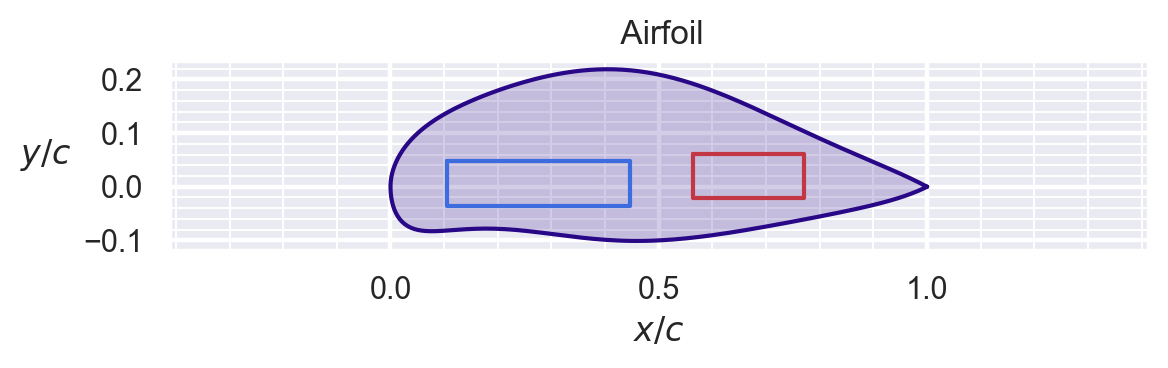

Step: 6, Action: [-0.20788282  0.24993438  0.13495757 -0.20322368  0.2340208  -0.35222164
  0.23790526  0.20111796 -0.3455757   0.26283583 -0.28971276  0.2693286
  1.          0.22741105  0.06518529 -0.34046364 -0.34464   ], Reward: 61.96671402168976, Done: False, Done2: False Info: {'step': 7, 'efficiency': 62.14369532435305, 'cl': 0.511941523478918}
Obs: [ 0.41098502  0.47298545  0.5124739   0.6602491   0.6913389   0.4868392
  0.42918476  0.56565124 -0.5891264  -0.04270829 -0.12529525 -0.49307498
  0.01515703 -0.3616269  -0.16731936 -0.54891706  0.10349839]


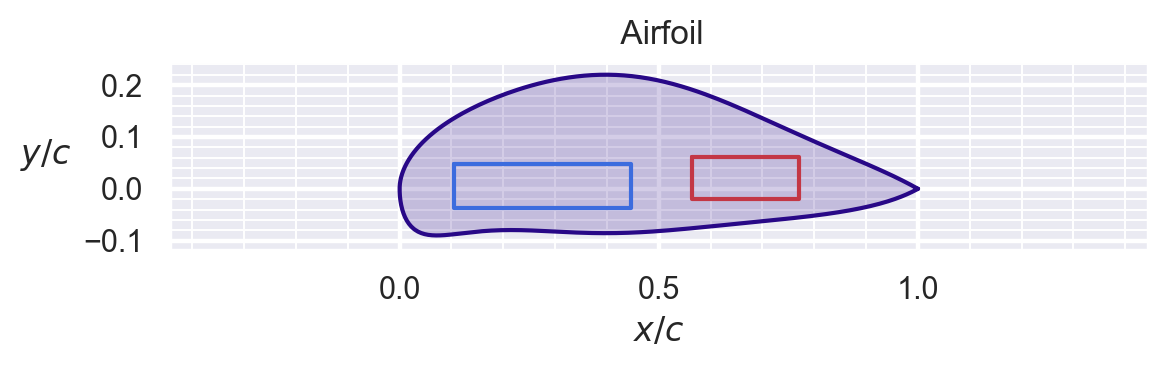

Step: 7, Action: [ 0.38169244 -0.02048928 -0.16272698  0.15106894 -0.07965573 -0.0653109
 -0.16703214 -0.12435079  0.2529582   0.21291965 -0.17185928 -0.35345188
 -0.3012961  -1.         -0.08713975  0.5464676  -0.24618497], Reward: 64.75510898052302, Done: False, Done2: False Info: {'step': 8, 'efficiency': 65.6014605064905, 'cl': 0.5254807367236555}
Obs: [ 0.4682389   0.46991205  0.48806486  0.6829095   0.67939055  0.47704256
  0.40412995  0.5469986  -0.5511826  -0.01077034 -0.15107414 -0.54609275
 -0.03003739 -0.5116269  -0.18039033 -0.4669469   0.06657065]


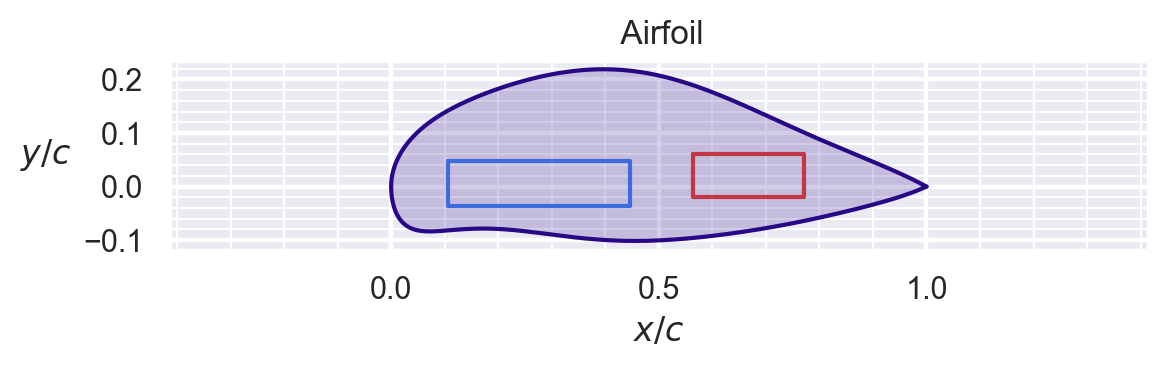

Step: 8, Action: [-0.13626698  0.14489664  0.15611984 -0.22456889  0.2750694  -0.38062987
  0.25012177  0.12919092 -0.25644526  0.2602271  -0.2782546   0.21276125
  1.          0.28342378  0.09835122 -0.35940695 -0.2639019 ], Reward: 63.93657656520099, Done: False, Done2: False Info: {'step': 9, 'efficiency': 64.43288636147786, 'cl': 0.5196628580340861}
Obs: [ 0.44779885  0.49164653  0.51148283  0.64922416  0.720651    0.4199481
  0.44164822  0.5663773  -0.58964944  0.02826373 -0.19281232 -0.5141786
  0.11996262 -0.46911332 -0.16563764 -0.52085793  0.02698536]


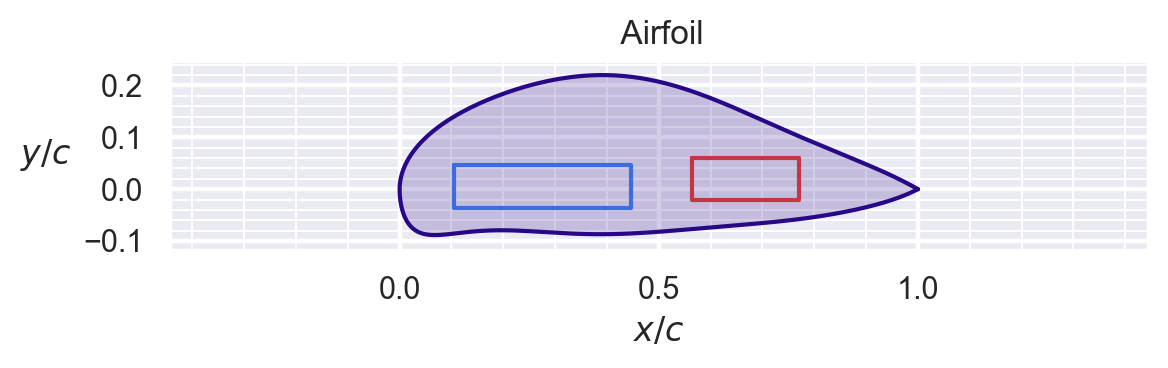

Step: 9, Action: [ 0.35223815 -0.01217037 -0.10876     0.11841858 -0.05661242 -0.1295629
 -0.05758232 -0.13658658  0.20505203  0.19499703 -0.13578072 -0.3582241
 -0.29575598 -1.         -0.12440022  0.47293895 -0.24845544], Reward: 64.95865262133138, Done: True, Done2: False Info: {'step': 10, 'efficiency': 67.60575714229955, 'cl': 0.5446890312481163}
Obs: [ 0.50063455  0.489821    0.49516883  0.66698694  0.7121591   0.40051365
  0.43301088  0.5458893  -0.55889165  0.05751329 -0.21317944 -0.5679122
  0.07559922 -0.6191133  -0.18429767 -0.44991708 -0.01028296]


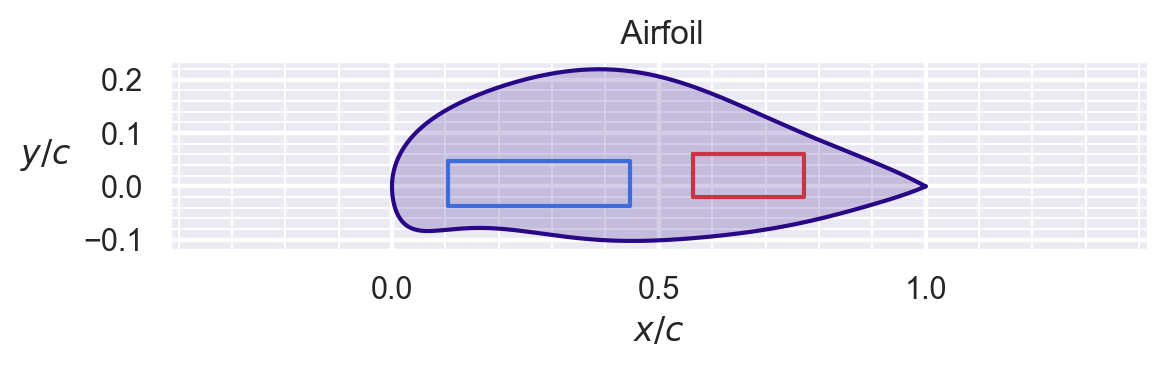

Step: 10, Action: [ 1.         1.         1.         1.         1.         1.
  1.         1.        -1.        -0.9321843  1.        -1.
 -1.        -1.        -1.        -1.         1.       ], Reward: -100, Done: False, Done2: False Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.25        0.25        0.25        0.25        0.25        0.25
  0.25        0.25       -0.25       -0.23982765  0.05       -0.25
 -0.25       -0.25       -0.25       -0.25        0.15      ]


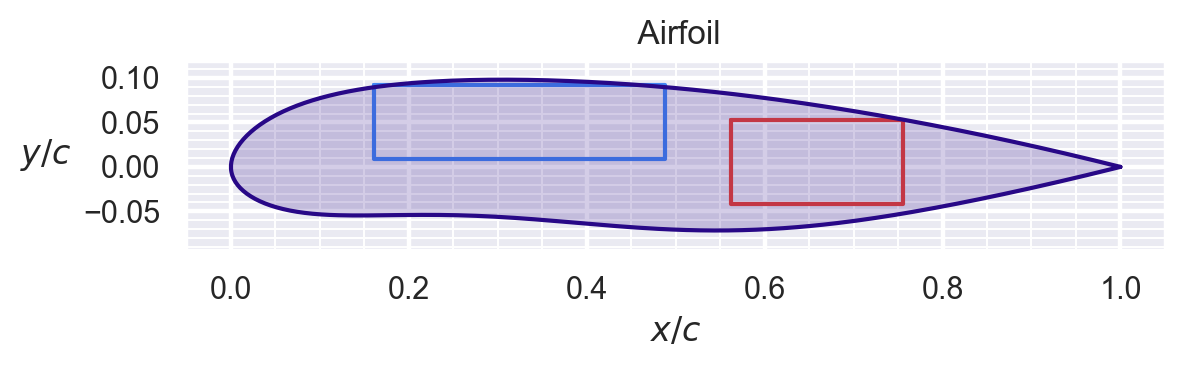

Step: 11, Action: [ 0.8094228   0.44320703  1.          1.          1.          1.
  1.          1.         -1.          0.19260885  0.85939395 -0.86206263
 -0.1184711  -0.26506627 -0.729004   -1.          0.8811839 ], Reward: 39.31153585232968, Done: False, Done2: False Info: {'step': 2, 'efficiency': 48.39698896540577, 'cl': 0.3980393234163626}
Obs: [ 0.37141344  0.31648105  0.4         0.4         0.4         0.4
  0.4         0.4        -0.4        -0.21093632  0.17890911 -0.37930942
 -0.26777068 -0.28975993 -0.35935062 -0.4         0.2821776 ]


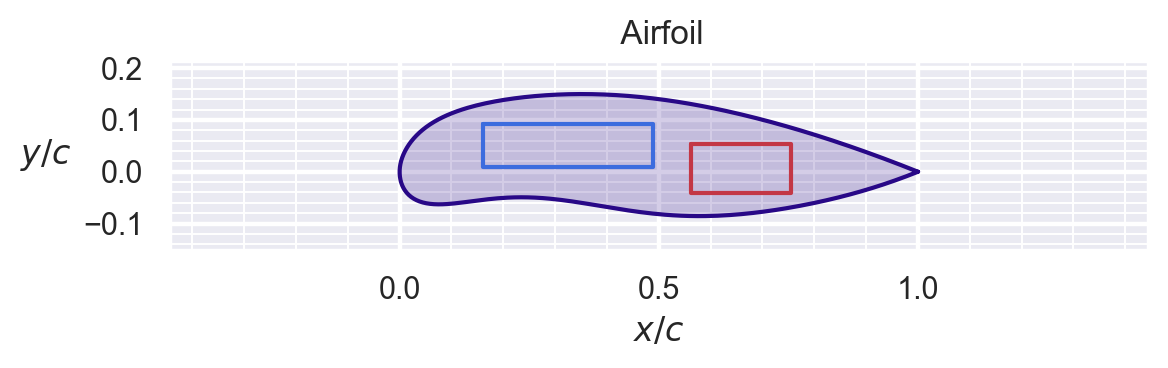

Step: 12, Action: [ 0.06727126 -0.02815399  1.          1.          1.          1.
  0.43064967  0.65429145 -0.30021775  0.42050242 -0.62979734 -0.3481271
  1.          0.9875395   1.         -1.         -0.19904472], Reward: 69.102504394257, Done: False, Done2: False Info: {'step': 3, 'efficiency': 70.06449394220894, 'cl': 0.5262918112215684}
Obs: [ 0.38150412  0.31225798  0.55        0.55        0.55        0.55
  0.46459746  0.49814373 -0.4450327  -0.14786096  0.08443949 -0.43152848
 -0.11777066 -0.14162901 -0.2093506  -0.55        0.2523209 ]


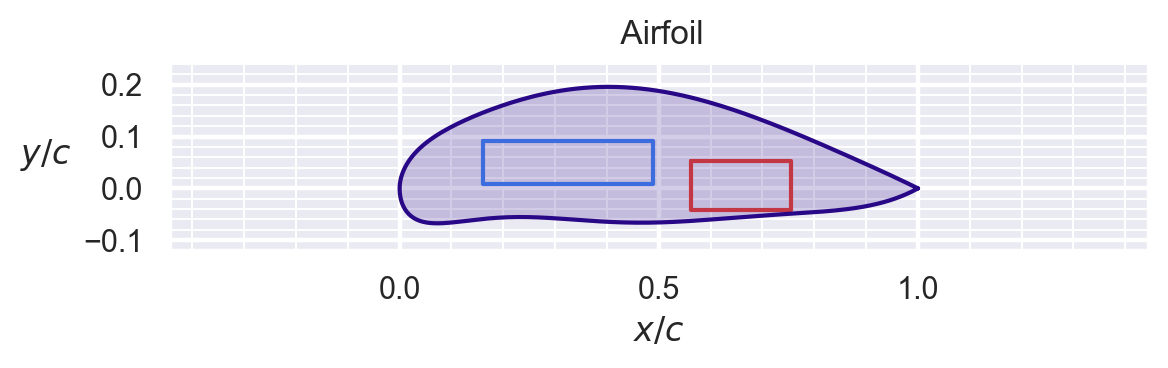

Step: 13, Action: [ 0.40714243  0.5757625  -0.3046043   1.          0.46771058  0.30292532
 -0.5988389  -0.20635758  0.03530325  0.24700186 -0.16412722 -0.6398185
 -0.80988    -1.          0.10016606  0.45231807 -0.04980564], Reward: 66.00226769447185, Done: False, Done2: False Info: {'step': 4, 'efficiency': 68.95478625667073, 'cl': 0.5467770871940486}
Obs: [ 0.44257548  0.39862233  0.50430936  0.70000005  0.6201566   0.59543884
  0.37477162  0.4671901  -0.4397372  -0.11081068  0.05982041 -0.5275012
 -0.23925267 -0.29162902 -0.1943257  -0.4821523   0.24485004]


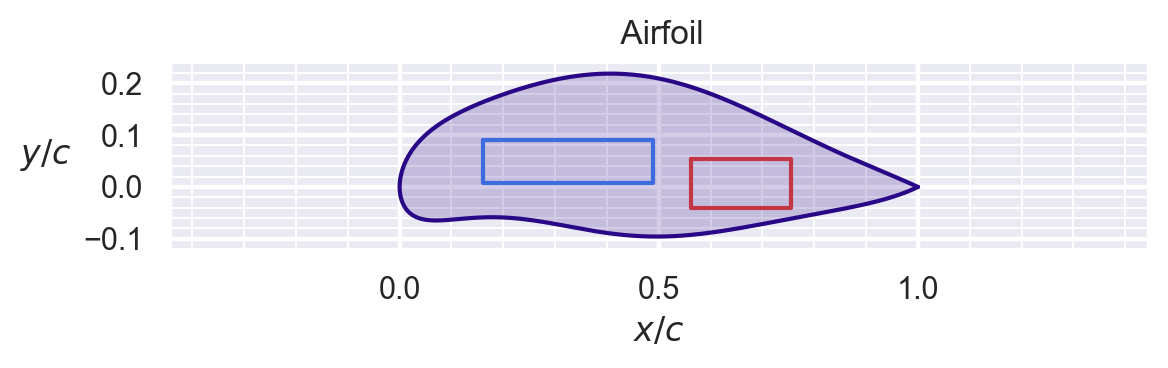

Step: 14, Action: [-0.5535326   0.30234206 -0.02206261 -0.39625514  0.04639167 -0.63070804
  0.12555368  0.36417824 -0.38263267  0.4886751  -0.36935273  0.36942297
  1.          0.51948345  0.27363095 -0.41398448 -0.46893582], Reward: 69.19960909515287, Done: False, Done2: False Info: {'step': 5, 'efficiency': 70.42376325616439, 'cl': 0.5296104194218177}
Obs: [ 0.3595456   0.44397366  0.501       0.64056176  0.62711537  0.5008326
  0.39360467  0.52181685 -0.4971321  -0.03750942  0.0044175  -0.4720878
 -0.08925267 -0.2137065  -0.15328105 -0.54424995  0.17450967]


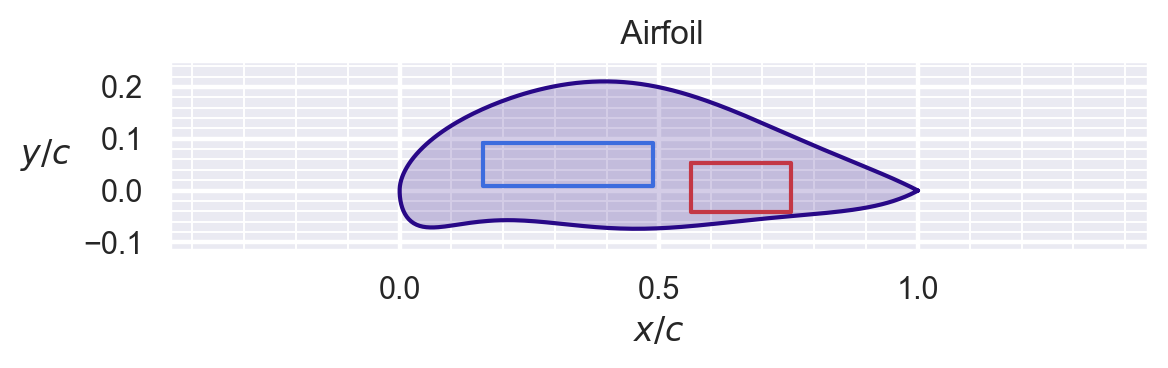

Step: 15, Action: [ 0.5512522  -0.06526554 -0.22358482  0.2782921  -0.03794707  0.1562617
 -0.37215653 -0.12198588  0.32771993  0.15842682 -0.08051217 -0.3463206
 -0.42027277 -1.         -0.14329144  0.7134959  -0.14959188], Reward: 71.71189392299813, Done: False, Done2: False Info: {'step': 6, 'efficiency': 74.2951276247905, 'cl': 0.5420646847778745}
Obs: [ 0.4422334   0.43418384  0.46746227  0.6823056   0.6214233   0.52427185
  0.3377812   0.50351894 -0.4479741  -0.01374539 -0.00765933 -0.5240359
 -0.1522936  -0.3637065  -0.17477477 -0.43722558  0.15207088]


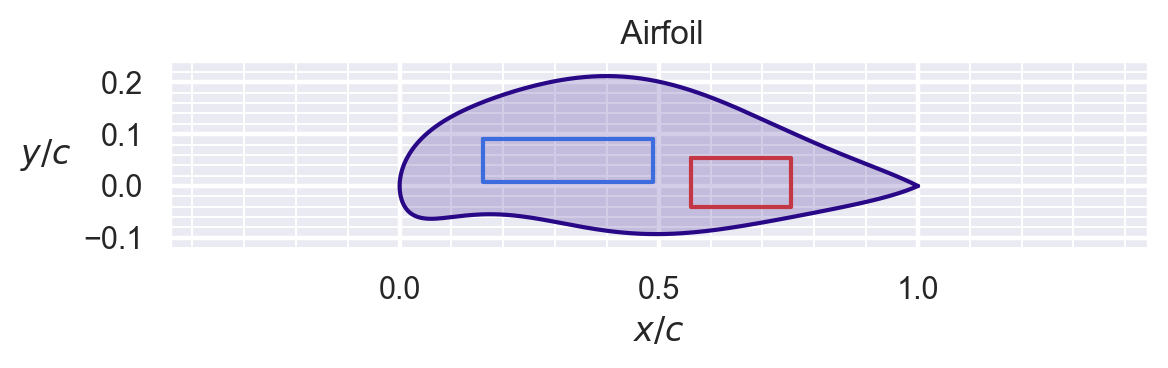

Step: 16, Action: [-0.24802366  0.2532113   0.12219124 -0.20297863  0.24039975 -0.38375422
  0.21547523  0.26487288 -0.33565506  0.2169952  -0.259018    0.25521135
  1.          0.152432    0.08260302 -0.3527906  -0.2936727 ], Reward: 71.2563734760216, Done: False, Done2: False Info: {'step': 7, 'efficiency': 74.74528529004085, 'cl': 0.5488885824070888}
Obs: [ 0.40502986  0.47216552  0.48579094  0.65185875  0.6574833   0.46670872
  0.37010247  0.5432499  -0.49832237  0.01880389 -0.04651203 -0.4857542
 -0.00229358 -0.3408417  -0.16238432 -0.49014416  0.10801998]


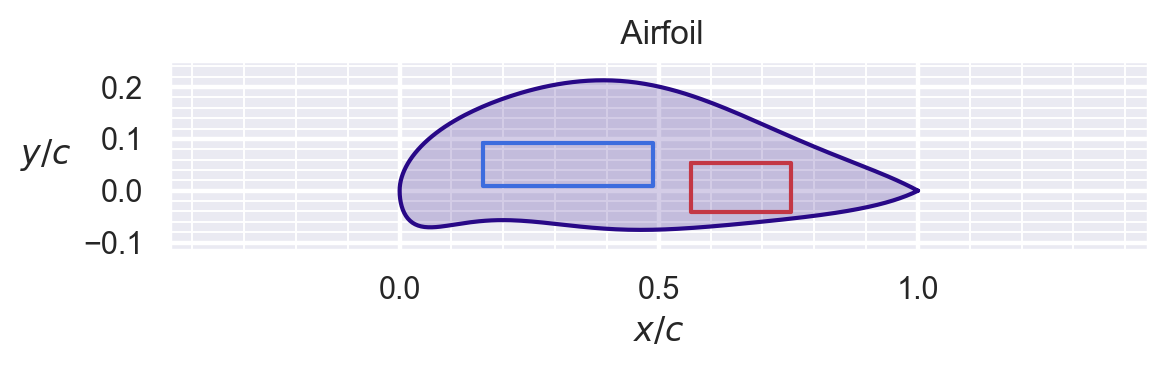

Step: 17, Action: [ 0.35046175 -0.05351146 -0.15473576  0.13139828 -0.03973799 -0.07479608
 -0.16713993 -0.10289934  0.24596138  0.19316089 -0.17100362 -0.3443288
 -0.12682566 -1.         -0.02050849  0.46683806 -0.1868309 ], Reward: 72.27249211825028, Done: False, Done2: False Info: {'step': 8, 'efficiency': 77.243476504915, 'cl': 0.5576709968410485}
Obs: [ 0.45759913  0.4641388   0.4625806   0.6715685   0.6515226   0.4554893
  0.3450315   0.527815   -0.46142817  0.04777802 -0.07216258 -0.5374035
 -0.02131743 -0.49084172 -0.16546059 -0.42011845  0.07999534]


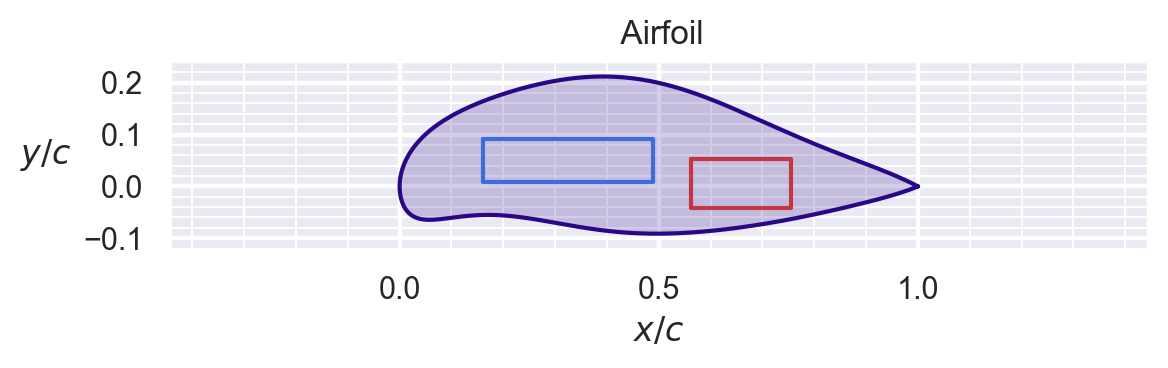

Step: 18, Action: [-0.13483807  0.13062829  0.14631316 -0.2012548   0.26627043 -0.3746775
  0.26376072  0.11645232 -0.23647769  0.25089657 -0.27357423  0.15088776
  1.          0.19135936  0.14266655 -0.35693252 -0.22619718], Reward: 72.81436511372884, Done: False, Done2: False Info: {'step': 9, 'efficiency': 77.40271584369377, 'cl': 0.5552759485093259}
Obs: [ 0.43737343  0.48373306  0.48452756  0.6413803   0.6914631   0.39928767
  0.3845956   0.54528284 -0.4968998   0.08541251 -0.11319871 -0.5147703
  0.12868257 -0.4621378  -0.14406061 -0.47365835  0.04606576]


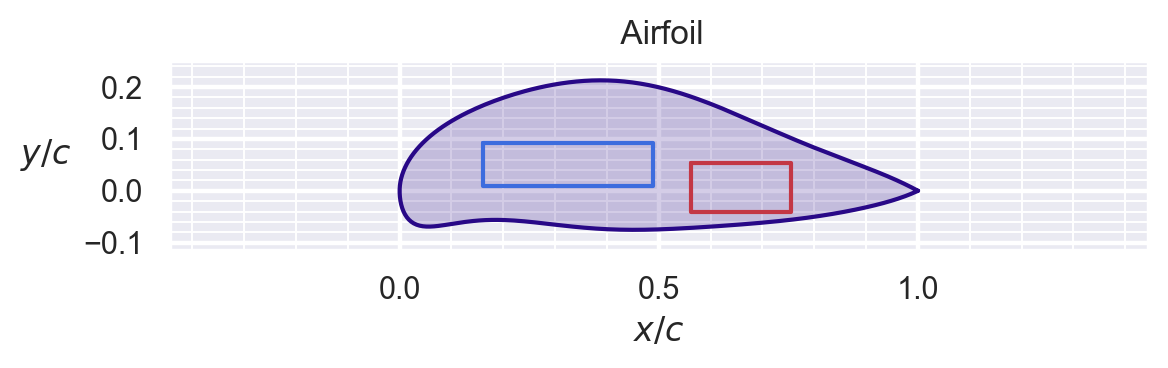

Step: 19, Action: [ 0.32071483 -0.02161367 -0.09110783  0.10552033 -0.04588547 -0.14975616
 -0.02317735 -0.14118496  0.1885978   0.19639659 -0.13460277 -0.36176327
 -0.23354217 -0.9866211  -0.07769486  0.41289115 -0.20767294], Reward: 71.33544027742076, Done: True, Done2: False Info: {'step': 10, 'efficiency': 78.66134486441075, 'cl': 0.5699137331014286}
Obs: [ 0.48548067  0.48049098  0.47086138  0.6572083   0.6845803   0.37682426
  0.38111898  0.5241051  -0.46861014  0.114872   -0.13338913 -0.5690348
  0.09365125 -0.61013097 -0.15571484 -0.41172466  0.01491482]


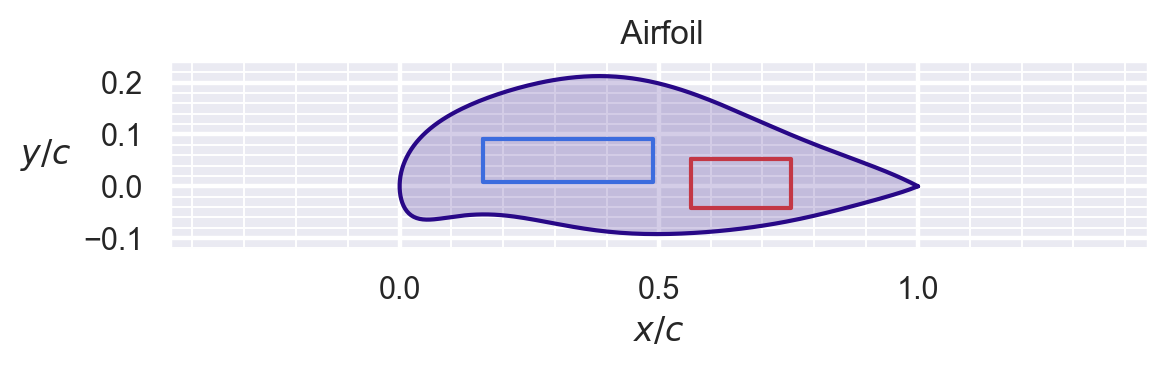

In [59]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)

    obs, reward, done, _, info = env.step(action)
    
    print(f"Step: {i}, Action: {action}, Reward: {reward}, Done: {done}, Done2: {done2} Info: {info}")
    print(f"Obs: {obs['airfoil']}")
    env.render()

    if done:
        obs, _ = env.reset()

